<a href="https://colab.research.google.com/github/BankNatchapol/ML-Algorithm/blob/master/why_no_MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **why no MSE**
---
ทำไมถึงไม่ใช้ Mean Square Error(MSE) เป็น cost function ในการทำ classification <br> จากที่เรารู้ว่าในการใช้ Logistic Regression ในการทำ classification นั้นตัว cost function นั้นจัต้องใช้เป็น Cross-Entropy <br> แล้วมันดีกว่า cost function ที่เป็น mse ยังไง เรามาดูกันครับ

In [0]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([[-20,-5,-1,10,-50,-10,2,-3,4,1]])
y = np.array([[-1,3,-2,3,4,-5,1,3,-4,1]])
theta = np.array([[0]])

เรอ่มต้นก็มาดูข้อมูลที่จะใช้กันก่อน

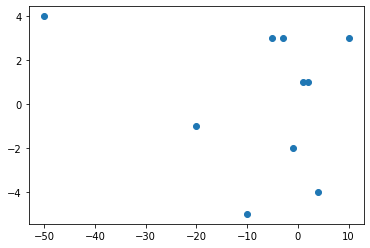

In [620]:
plt.scatter(x,y);

สร้าง function sigmoid และ MSE cost function <br><br>
\begin{equation}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation}
<br>
และ
<br>
\begin{equation}
J(\theta) = \frac{1}{2m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})^2
\end{equation}<br>
โดยที่
\begin{equation}
h_{\theta}(x) = \sigma(\theta^Tx)
\end{equation}

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def cost(theta,x,y):
  m = len(x)
  return (1/(2*m))*sum(((sigmoid(np.dot(theta.T,x))-y)**2)[0])

เมื่อทำการ plot cost function ที่เป็น MSE ออกมาจะพบว่าในบางกรณีจะสามารถเกิด local minimum ได้หรือเรียกว่าเป็น None-convex function ซึ่งทำให้ในการ run optimizer algorithm เช่น gradient descent  นั้น อาจจะเกิดการที่ค่า parameter วิ่งเข้าสู่ local minimum ซึ่งทำให้ได้ผลลัพท์ที่ผิดพลาดได้ 

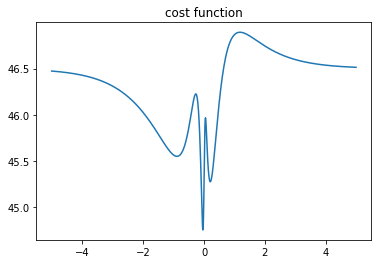

In [622]:
s = []
i=-5
while i<4.99:
  s.append(cost( np.array([[i]]),x,y))
  i+=0.01
plt.plot(np.arange(-5,5,0.01),s);
plt.title('cost function');

In [0]:
q = []
a = 100
for i in s:
  if a-i<0:
    q.append(i)
    break
  a = i
a = 100
s.reverse()
for i in s[400:]:
  if a-i<0:
    q.append(i)
    break
  a = i
s.reverse()
q.append(min(s))
ind = []
for i in q:
  ind.append(s.index(i))

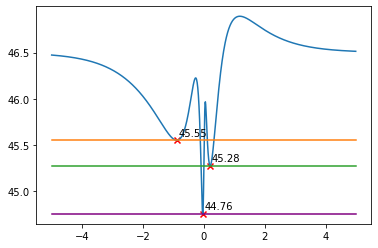

In [624]:
#@title Local minimum
plt.plot(np.arange(-5,5,0.01),s);
plt.plot([-5,5],[q[0],q[0]])
plt.plot([-5,5],[q[1],q[1]])
plt.plot([-5,5],[q[2],q[2]],c='purple')
plt.scatter(np.arange(-5,5,0.01)[s.index(q[0])],q[0],marker='x',c='red')
plt.text(np.arange(-5,5,0.01)[s.index(q[0])]+0.05,q[0]+0.05,round(q[0], 2));
plt.scatter(np.arange(-5,5,0.01)[s.index(q[1])],q[1],marker='x',c='red')
plt.text(np.arange(-5,5,0.01)[s.index(q[1])]+0.05,q[1]+0.05,round(q[1], 2));
plt.scatter(np.arange(-5,5,0.01)[s.index(q[2])],q[2],marker='x',c='red')
plt.text(np.arange(-5,5,0.01)[s.index(q[2])]+0.05,q[2]+0.05,round(q[2], 2));

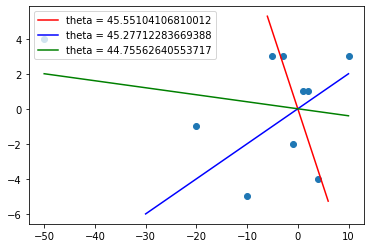

In [625]:
#@title All line comparison
plt.scatter(x,y);
plt.plot(np.arange(-6,6,0.01),list(map(lambda x:x*np.arange(-5,5,0.01)[ind[0]],list(np.arange(-6,6,0.01)))),'r')
plt.plot(np.arange(-30,10,0.01),list(map(lambda x:x*np.arange(-5,5,0.01)[ind[1]],list(np.arange(-30,10,0.01)))),'blue')
plt.plot(np.arange(-50,10,0.01),list(map(lambda x:x*np.arange(-5,5,0.01)[ind[2]],list(np.arange(-50,10,0.01)))),'green')
plt.legend(['theta = 45.55104106810012',
            'theta = 45.27712283669388',
            'theta = 44.75562640553717']);

ดังนั้นเราจึงใช้ Cross-Entropy แทน เพื่อให้ได้ผลลัพท์ที่ดีกว่า โดยจะเป็นสมการ<br><br>
\begin{equation}
J(\theta) = -\frac{1}{m}\sum^m_{i=1}[y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]
\end{equation}

In [0]:
def crossEn(theta,x,y):
  m = len(x)
  h = sigmoid(np.dot(theta,x))
  pp = np.log(1-h)
  pp[pp<-10000000] = -36
  return (1/m)*(-np.dot(y,np.log(h).T)-np.dot((1-y),pp.T))

ซึ่งจากผลลัพท์ที่ได้จะเห็นว่าเราจะสามารถวิ่งเข้าสู่ global minimum ได้เลย

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Cross-Entropy')

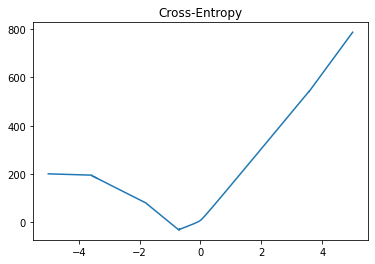

In [627]:
s = []
i=-5
while i<5:
  s.append(crossEn( np.array([[i]]),x,y)[0][0]);
  i+=0.001;
plt.plot(np.arange(-5,5,0.001),s);
plt.title('Cross-Entropy')

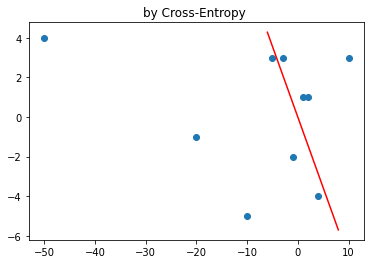

In [628]:
plt.scatter(x,y);
plt.plot(np.arange(-6,8,0.01),list(map(lambda x:x*np.arange(-5,5,0.001)[s.index(min(s))],list(np.arange(-6,8,0.01)))),'r');
plt.title('by Cross-Entropy ');